In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import silhouette_score

In [2]:
# Importing dataset by pandas
data = pd.read_csv('Country_clusters.csv')

In [4]:
data

,Unnamed: 0,Country,Lattitude,Longitude,Language
0,0,USA,44.97,-103.77,English
1,1,Canada,62.40,-96.80,Canadian
2,2,France,46.75,2.40,French0
3,3,UK,54.01,-2.53,English
4,4,Germany,51.15,10.40,German
5,5,Austrelia,-25.45,133.11,English


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6 non-null      int64  
 1   Country     6 non-null      object 
 2   Lattitude   6 non-null      float64
 3   Longitude   6 non-null      float64
 4   Language    6 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 368.0+ bytes


In [11]:
datasubset = data.loc[:, ["Lattitude","Longitude"]]
datasubset

,Lattitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


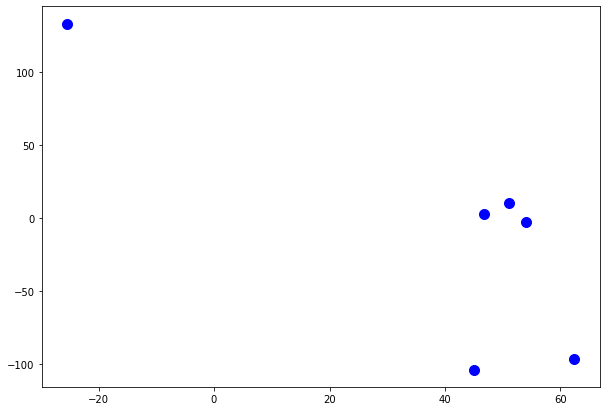

In [9]:
plt.figure(figsize=(10, 7))
plt.scatter(datasubset[["Lattitude"]], datasubset[["Longitude"]], s=100, c='blue')

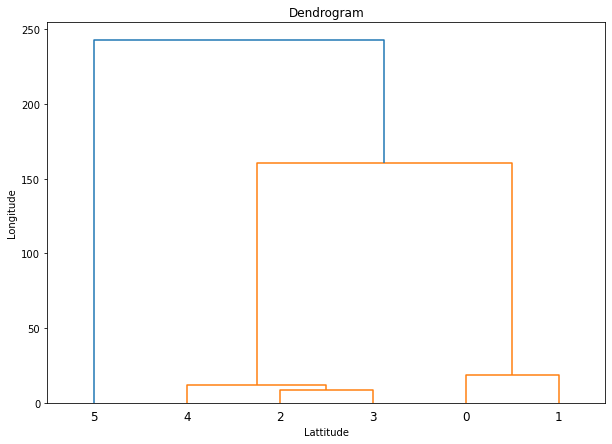

In [12]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))


dendrogram = sch.dendrogram(sch.linkage(datasubset, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Lattitude')
plt.ylabel('Longitude')
plt.show()

#check for largest distance vertically without crossing any horizontal line

In [16]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(datasubset)

array([0, 0, 0, 0, 0, 1], dtype=int64)

In [17]:
cl = cluster.fit_predict(datasubset)

In [20]:
silhouette_score(datasubset,cl)

0.5304645611596158

In [21]:
X = datasubset.values

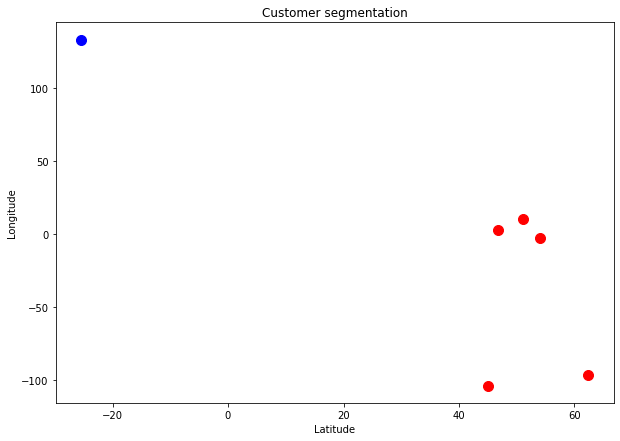

In [22]:
plt.figure(figsize=(10, 7))  
plt.scatter(X[cl==0, 0], X[cl==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[cl==1, 0], X[cl==1, 1], s=100, c='blue', label ='Cluster 2')
plt.title('Customer segmentation')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [24]:
silhouette_score_list=[]
for k in range(2,6):
    Hierarchical_model_new=AgglomerativeClustering(n_clusters=k)
    y_pred_new=Hierarchical_model_new.fit_predict(datasubset)
    silhouette_coefficient=silhouette_score(datasubset,y_pred_new)
    silhouette_score_list.append(silhouette_coefficient)
    print(f'for k == {k},& silhouette score is {silhouette_coefficient}')
    
silhouette_score_list

for k == 2,& silhouette score is 0.5304645611596158
for k == 3,& silhouette score is 0.7232813961472381
for k == 4,& silhouette score is 0.4484580204468096
for k == 5,& silhouette score is 0.06268959249436608


[0.5304645611596158,
 0.7232813961472381,
 0.4484580204468096,
 0.06268959249436608]

In [78]:
#trying DBSCAN
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

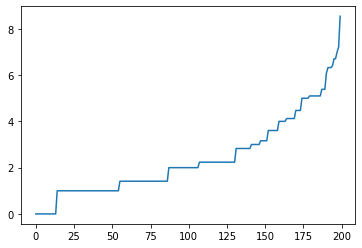

In [79]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [80]:
from sklearn.cluster import DBSCAN
dbscancluster = DBSCAN(eps=7, min_samples=5)
dbscancluster.fit(X)
clusters = dbscancluster.labels_

In [81]:
len(set(clusters))

3

In [82]:
silhouette_score(X,clusters)

0.28705019416571775

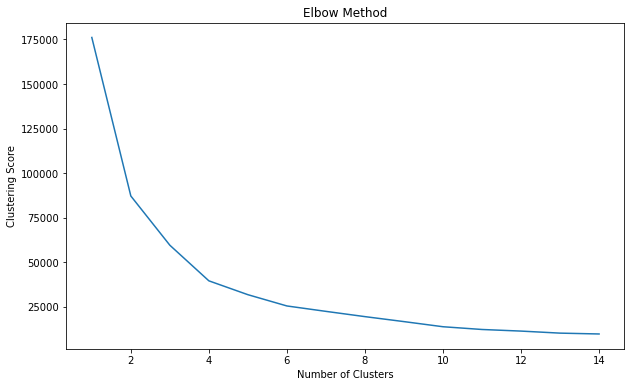

In [83]:
from sklearn.cluster import KMeans
#try kmeans
individual_clustering_score = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    individual_clustering_score.append(kmeans.inertia_) 
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 15), individual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [84]:
#Fit the model and predict
kmeans= KMeans(n_clusters = 2, random_state = 42)


kmeans.fit(X)


pred = kmeans.predict(X)

pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [85]:
silhouette_score(X,pred)

0.42620850066216065

In [86]:
#Result on scaled data
from sklearn.preprocessing import normalize
scaled = normalize(X)
scaled = pd.DataFrame(data_scaled)
scaled.head()

,0,1
0,0.784883,0.619644
1,0.813733,0.581238
2,0.780869,0.624695
3,0.820905,0.571064
4,0.876812,0.480833


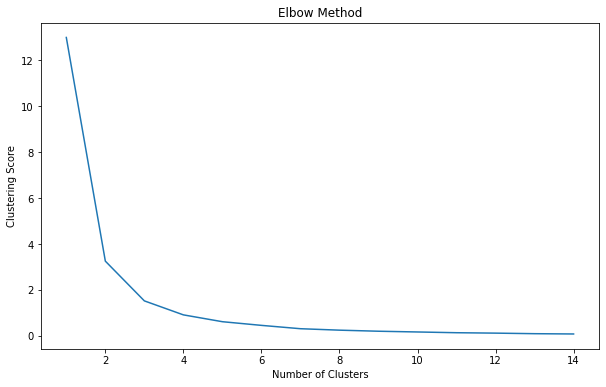

In [87]:
individual_clustering_score = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(scaled)
    individual_clustering_score.append(kmeans.inertia_) 
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 15), individual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [88]:
#Fit the model and predict
kmeans= KMeans(n_clusters = 2, random_state = 42)


kmeans.fit(scaled)


pred = kmeans.predict(scaled)

pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [89]:
silhouette_score(data_scaled,pred)

0.6417253843787616

In [ ]:
#Options to improve cluster
#Interview questions